Grafo original com 8 nós:
Arestas do grafo original: [(0, 6), (1, 2), (2, 4), (2, 7), (2, 0), (3, 6), (4, 3), (4, 5), (5, 6), (5, 0), (5, 1), (6, 7), (6, 2), (6, 4), (7, 4)]


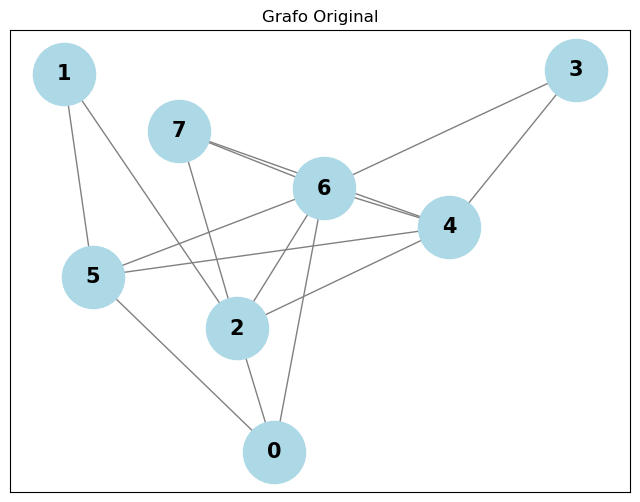

Número de arestas removíveis mantendo o grafo ligado: 6
Arestas removíveis: {(2, 4), (6, 2), (2, 7), (6, 4), (5, 0), (5, 6)}
Erro: a aresta (2, 4) não existe no grafo original!
Erro: a aresta (6, 2) não existe no grafo original!
Erro: a aresta (2, 7) não existe no grafo original!
Erro: a aresta (6, 4) não existe no grafo original!
Erro: a aresta (5, 0) não existe no grafo original!
Erro: a aresta (5, 6) não existe no grafo original!
Grafo resultante após remoção das arestas:


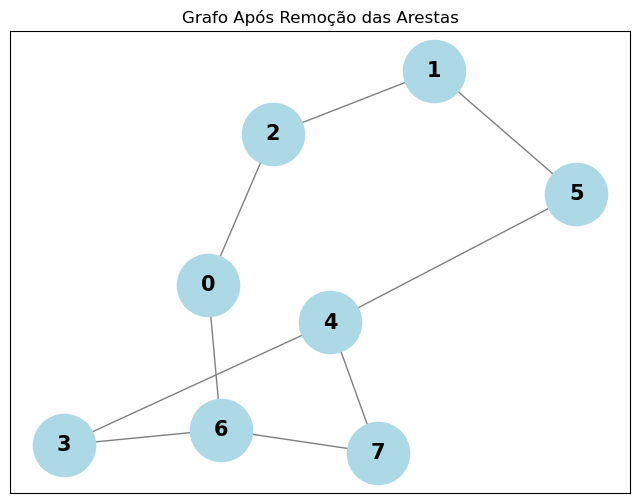

In [26]:
import networkx as nx
import random
import matplotlib.pyplot as plt

def generate_strongly_connected_graph(N):
    while True:
        G = nx.DiGraph()
        
        # Adicionar os nós
        G.add_nodes_from(range(N))
        
        # Conectar cada nó com 1 a 3 descendentes
        for node in G.nodes():
            num_descendants = random.randint(1, 3)  # Número aleatório de descendentes
            potential_descendants = [n for n in G.nodes() if n != node and not G.has_edge(n, node)]  # Evitar arestas reversas
            
            descendants = random.sample(potential_descendants, min(num_descendants, len(potential_descendants)))
            
            for descendant in descendants:
                G.add_edge(node, descendant)
        
        # Verificar se o grafo é fortemente conexo
        if nx.is_strongly_connected(G):
            return G

def find_max_removable_edges(G):
    removable_edges = set()
    
    # Verificar cada aresta do grafo
    for edge in list(G.edges()):
        G.remove_edge(*edge)  # Remover temporariamente a aresta
        
        if nx.is_strongly_connected(G):
            # Se o grafo continuar fortemente conectado, essa aresta é removível
            removable_edges.add(edge)
        else:
            # Se a aresta for crítica para manter o grafo conectado, recolocamos a aresta
            G.add_edge(*edge)
    
    return removable_edges

def plot_graph(G, title):
    pos = nx.spring_layout(G)  # Layout para a visualização
    plt.figure(figsize=(8, 6))
    
    # Desenhar os nós
    nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=2000)
    
    # Desenhar as arestas com setas (direcionadas)
    nx.draw_networkx_edges(G, pos, edge_color='gray', arrows=True, arrowstyle='->', arrowsize=20)
    
    # Desenhar os rótulos dos nós
    nx.draw_networkx_labels(G, pos, font_size=15, font_color='black', font_weight='bold')
    
    plt.title(title)
    plt.show()

# Parte 1: Gerar o grafo
N = random.randint(6, 10)  # Número aleatório de nós entre 6 e 10
G = generate_strongly_connected_graph(N)

# Imprimir todas as arestas do grafo original
print(f"Grafo original com {N} nós:")
print(f"Arestas do grafo original: {list(G.edges())}")
plot_graph(G, "Grafo Original")

# Parte 2: Encontrar o maior número de arestas removíveis mantendo o grafo ligado
removable_edges = find_max_removable_edges(G)

# Parte 3: Criar um novo grafo sem as arestas removíveis
G_result = G.copy()
G_result.remove_edges_from(removable_edges)

# Plotar os grafos
print(f"Número de arestas removíveis mantendo o grafo ligado: {len(removable_edges)}")
print(f"Arestas removíveis: {removable_edges}")

# Certificar que as arestas removíveis existem no grafo original
for edge in removable_edges:
    if not G.has_edge(*edge):
        print(f"Erro: a aresta {edge} não existe no grafo original!")

print("Grafo resultante após remoção das arestas:")
plot_graph(G_result, "Grafo Após Remoção das Arestas")
